In [20]:
# Import all the package that are expected to be used:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Activate the ability for notebook to show plots on execution of a cell.
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


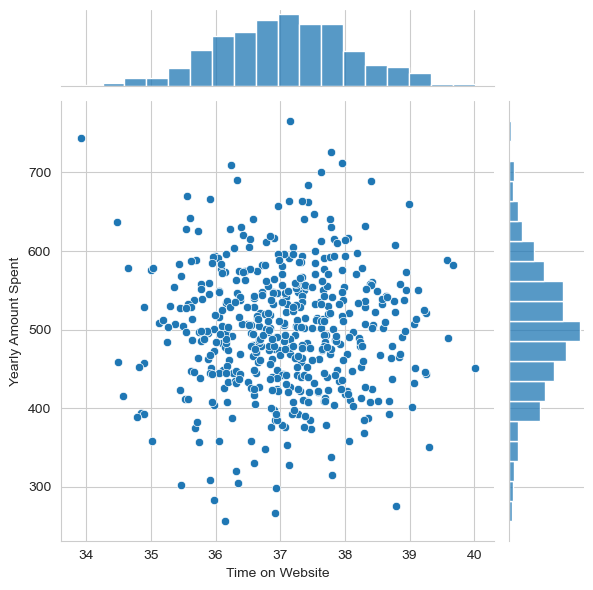

In [5]:
# Just some exploratory data analysis trying to find a trend or possible correlation.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


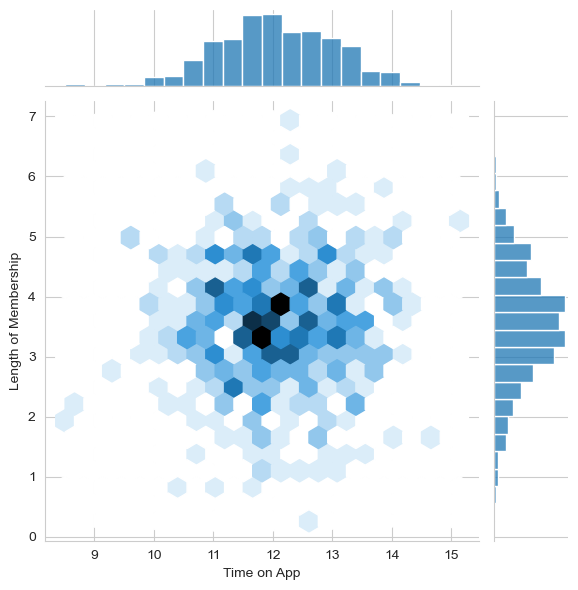

In [6]:
# Just some exploratory data analysis trying to find a trend or possible correlation.
sns.jointplot(x='Time on App',y='Length of Membership',data=df,kind='hex')

E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

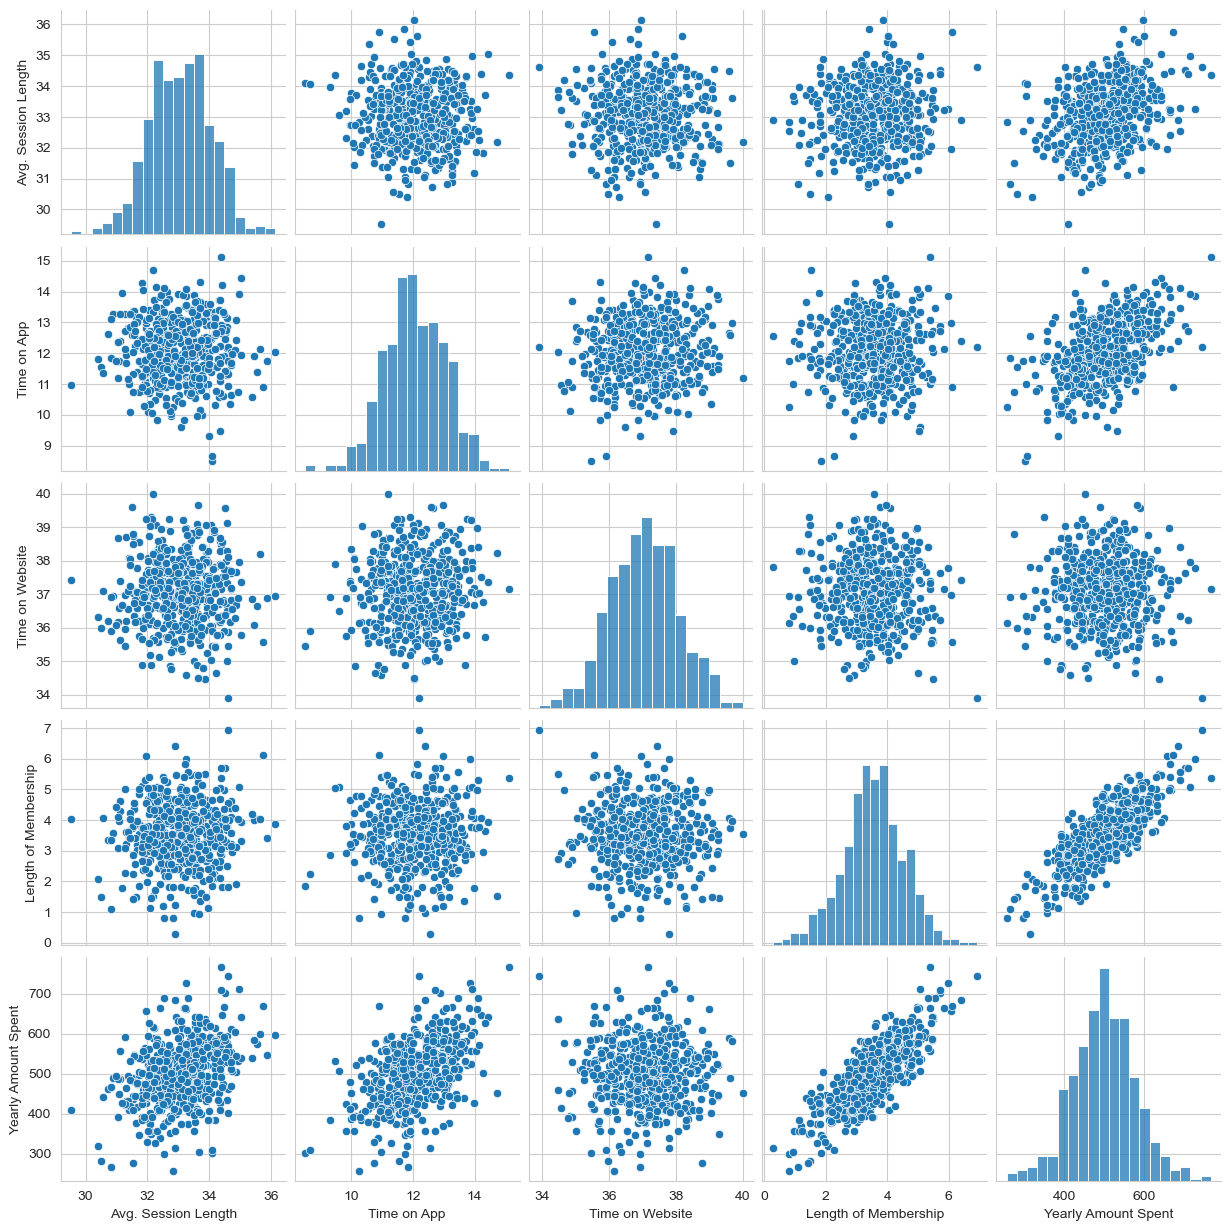

In [7]:
# Just some exploratory data analysis trying to find a trend or possible correlation.
sns.pairplot(data=df)

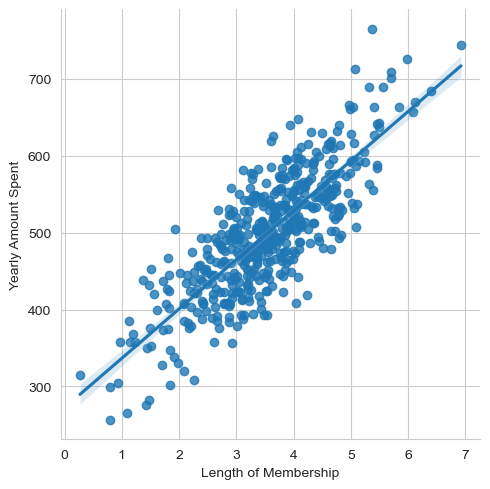

In [8]:
# Simple linear model plot to check for possible correlation as identified above.
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

In [9]:
# Creating the training and testing data sets.
# df.columns
x = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [10]:
# Creating and training the linear regression model:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [33]:
# Checking the coefficients of the model for each feature.
print(f'Coefficients: \n{lm.coef_}')

Coefficients: 
[25.98154972 38.59015875  0.19040528 61.27909654]


In [44]:
# Creating a dataframe to understand the coefficients and thus the effect of the features on the result.
# lm_coef = pd.DataFrame(lm.coef_,['Avg. Session Length','Time on App','Time on Website','Length of Membership'],['Coefficient'])
lm_coef = pd.DataFrame(lm.coef_,x.columns,['Coefficient'])
lm_coef

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [16]:
# Making predictions based off the trained model.
predictions = lm.predict(x_test)

Text(0, 0.5, 'Predicted Y')

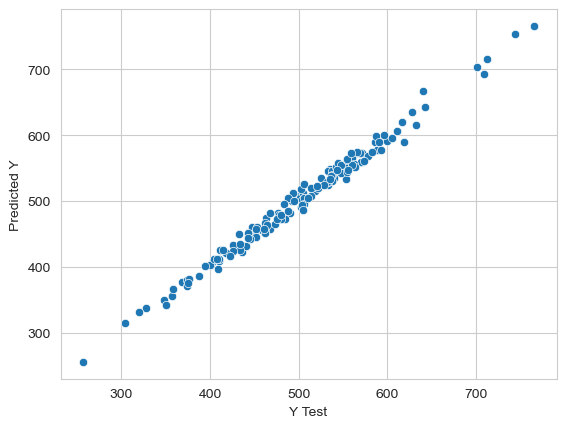

In [31]:
# Plot a simple scatterplot to see the accuracy of the predictions.
sns.scatterplot(x=y_test,y=predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [23]:
# Evaluating the model:
print(f'MAE: {metrics.mean_absolute_error(y_test,predictions)}')
print(f'MSE: {metrics.mean_squared_error(y_test,predictions)}')
print(f'MSE: {np.sqrt(metrics.mean_squared_error(y_test,predictions))}')

MAE: 7.228148653430806
MSE: 79.8130516509741
MSE: 8.933815066978614


E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


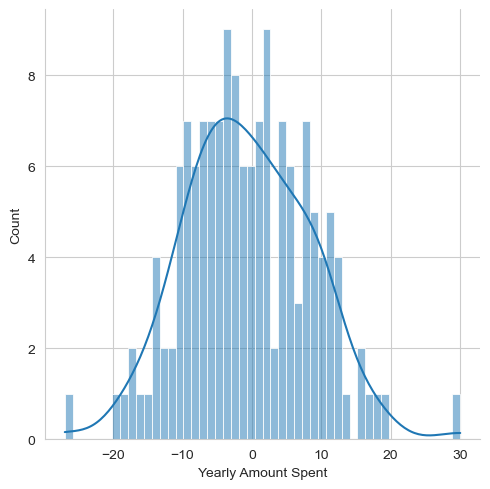

In [32]:
# Checking residuals to check for any problems:
sns.displot((y_test-predictions),kde=True,bins=50)